[Source](https://blog.keras.io/building-autoencoders-in-keras.html)

In [2]:
%matplotlib inline

In [36]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# this is the size of the encoded representations
encoding_dim = 32

#INPUT LAYER
input_img = Input(shape=(784,))

#ENCODE LAYER
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim*4, activation='relu')(input_img)
encoded = Dense(encoding_dim*2, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

#DECODED LAYER
# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim*2, activation='relu')(encoded)
decoded = Dense(encoding_dim*4, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

#MODEL
autoencoder = Model(input=input_img, output=decoded)


#SEPERATE ENCODER MODEL
encoder = Model(input=input_img, output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

# OLD retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]

# OLD create the decoder model
# decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

#COMPILER
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [48]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s - loss: 0.3723 - val_loss: 0.2636
Epoch 2/100
60000/60000 [==============================] - 4s - loss: 0.2578 - val_loss: 0.2503
Epoch 3/100
60000/60000 [==============================] - 4s - loss: 0.2425 - val_loss: 0.2338
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.2257 - val_loss: 0.2156
Epoch 5/100
60000/60000 [==============================] - 4s - loss: 0.2081 - val_loss: 0.2006
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.1973 - val_loss: 0.1922
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.1881 - val_loss: 0.1837
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.1810 - val_loss: 0.1783
Epoch 9/100
60000/60000 [==============================] - 4s - loss: 0.1750 - val_loss: 0.1703
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.1698 - val_lo

60000/60000 [==============================] - 4s - loss: 0.1045 - val_loss: 0.1037
Epoch 86/100
60000/60000 [==============================] - 4s - loss: 0.1041 - val_loss: 0.1041
Epoch 87/100
60000/60000 [==============================] - 4s - loss: 0.1039 - val_loss: 0.1038
Epoch 88/100
60000/60000 [==============================] - 4s - loss: 0.1037 - val_loss: 0.1016
Epoch 89/100
60000/60000 [==============================] - 4s - loss: 0.1034 - val_loss: 0.1035
Epoch 90/100
60000/60000 [==============================] - 4s - loss: 0.1031 - val_loss: 0.1014
Epoch 91/100
60000/60000 [==============================] - 4s - loss: 0.1028 - val_loss: 0.1023
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.1026 - val_loss: 0.1017
Epoch 93/100
60000/60000 [==============================] - 4s - loss: 0.1024 - val_loss: 0.1015
Epoch 94/100
60000/60000 [==============================] - 4s - loss: 0.1022 - val_loss: 0.1019
Epoch 95/100
60000/60000 [=================

In [49]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

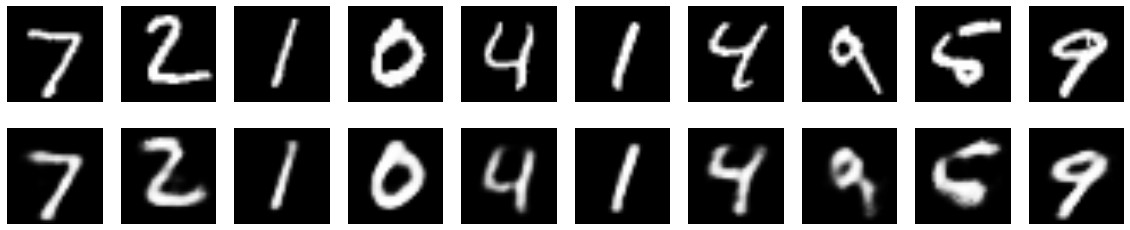

In [50]:
# use Matplotlib (don't ask)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# old stuff

In [37]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [38]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [42]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input_1 = Input(shape=(32,))
encoded_input_2 = Input(shape=(64,))
encoded_input_3 = Input(shape=(128,))

# retrieve the last layer of the autoencoder model
decoder_layer_1 = autoencoder.layers[-3]
decoder_layer_2 = autoencoder.layers[-2]
decoder_layer_3 = autoencoder.layers[-1]

# create the decoder model
decoder_1 = Model(input=encoded_input_1, output=decoder_layer_1(encoded_input_1))
decoder_2 = Model(input=encoded_input_2, output=decoder_layer_2(encoded_input_2))
decoder_3 = Model(input=encoded_input_3, output=decoder_layer_3(encoded_input_3))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [39]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


#===================================
# encoding_dim = 128

# # this model maps an input to its encoded representation
# encoder = Model(input_img, encoded)

# # create a placeholder for an encoded (32-dimensional) input
# encoded_input = Input(shape=(encoding_dim,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]

# decoded_input = Input(shape=(decoding_dim,))
# # create the decoder model
# decoder = Model(decoded_input, decoder_layer(decoded_input))

ValueError: Input 0 is incompatible with layer dense_36: expected axis -1 of input shape to have value 128 but got shape (None, 32)

In [43]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [44]:
(x_train, _), (x_test, _) = mnist.load_data()

In [45]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [46]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s - loss: 0.3455 - val_loss: 0.2650
Epoch 2/100
60000/60000 [==============================] - 4s - loss: 0.2604 - val_loss: 0.2564
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.2499 - val_loss: 0.2423
Epoch 4/100
60000/60000 [==============================] - 4s - loss: 0.2341 - val_loss: 0.2270
Epoch 5/100
60000/60000 [==============================] - 4s - loss: 0.2220 - val_loss: 0.2147
Epoch 6/100
60000/60000 [==============================] - 3s - loss: 0.2105 - val_loss: 0.2036
Epoch 7/100
60000/60000 [==============================] - 3s - loss: 0.2010 - val_loss: 0.1959
Epoch 8/100
60000/60000 [==============================] - 3s - loss: 0.1935 - val_loss: 0.1886
Epoch 9/100
60000/60000 [==============================] - 3s - loss: 0.1866 - val_loss: 0.1825
Epoch 10/100
60000/60000 [==============================] - 3s - loss: 0.1817 - val_lo

KeyboardInterrupt: 

In [35]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: Error when checking : expected input_15 to have shape (None, 128) but got array with shape (10000, 32)

In [ ]:
# use Matplotlib (don't ask)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()